In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 

{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [4]:
target_names = np.unique(y.values)
feature_names = X.columns
number_of_classes = len(target_names)
number_of_features = len(feature_names) 
number_of_instances = X.shape[0]

In [6]:
print("Target names: ", target_names)
print("Feature names: ", feature_names)
print("Number of features: ", number_of_features)
print("Number of classes: ", number_of_classes)
print("Number of instances: ", number_of_instances)

Target names:  ['g' 'h']
Feature names:  Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')
Number of features:  10
Number of classes:  2
Number of instances:  19020


In [7]:
df = pd.concat([X, y], axis=1)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In [8]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [9]:
df.value_counts('class')

class
g    12332
h     6688
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

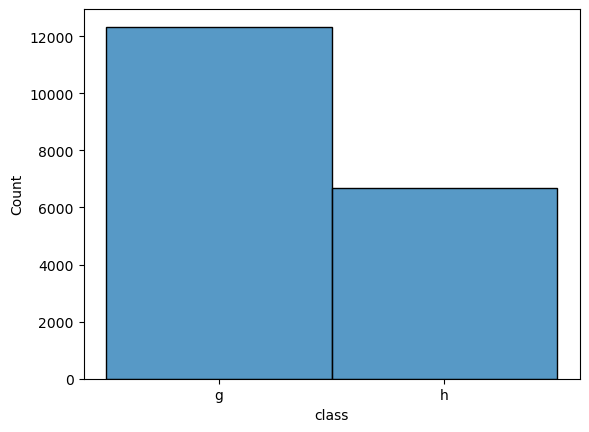

In [10]:
sns.histplot(df['class'])

# Визуализација на податоците

## Бокс-плотови

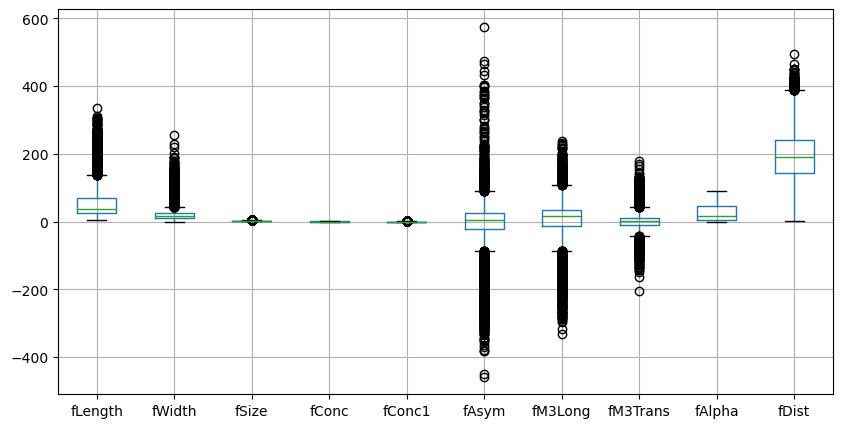

In [11]:
fig = plt.figure(figsize=(10, 5))
df.boxplot()
plt.show()

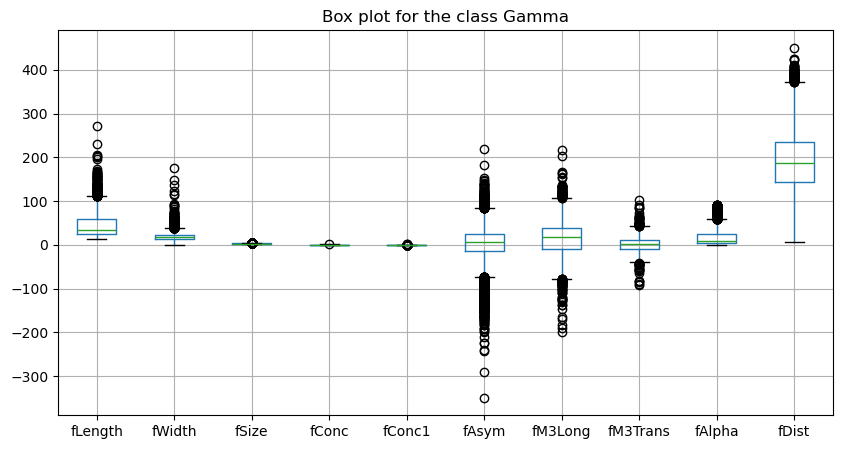

In [12]:
fig = plt.figure(figsize=(10, 5))
df[df['class']=='g'].drop(['class'], axis=1).boxplot()
plt.title('Box plot for the class Gamma')
plt.show()

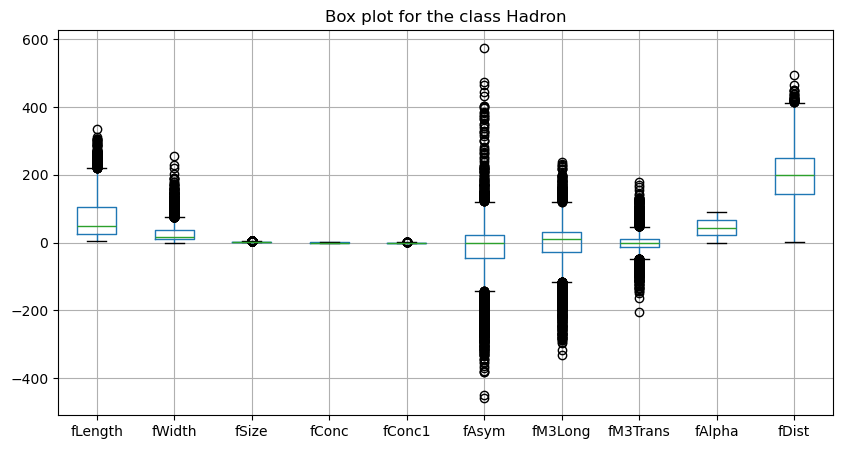

In [13]:
fig = plt.figure(figsize=(10, 5))
df[df['class']=='h'].drop(['class'], axis=1).boxplot()
plt.title('Box plot for the class Hadron')
plt.show()

## Хистограм на распределбата на вредонстите на атрибутите

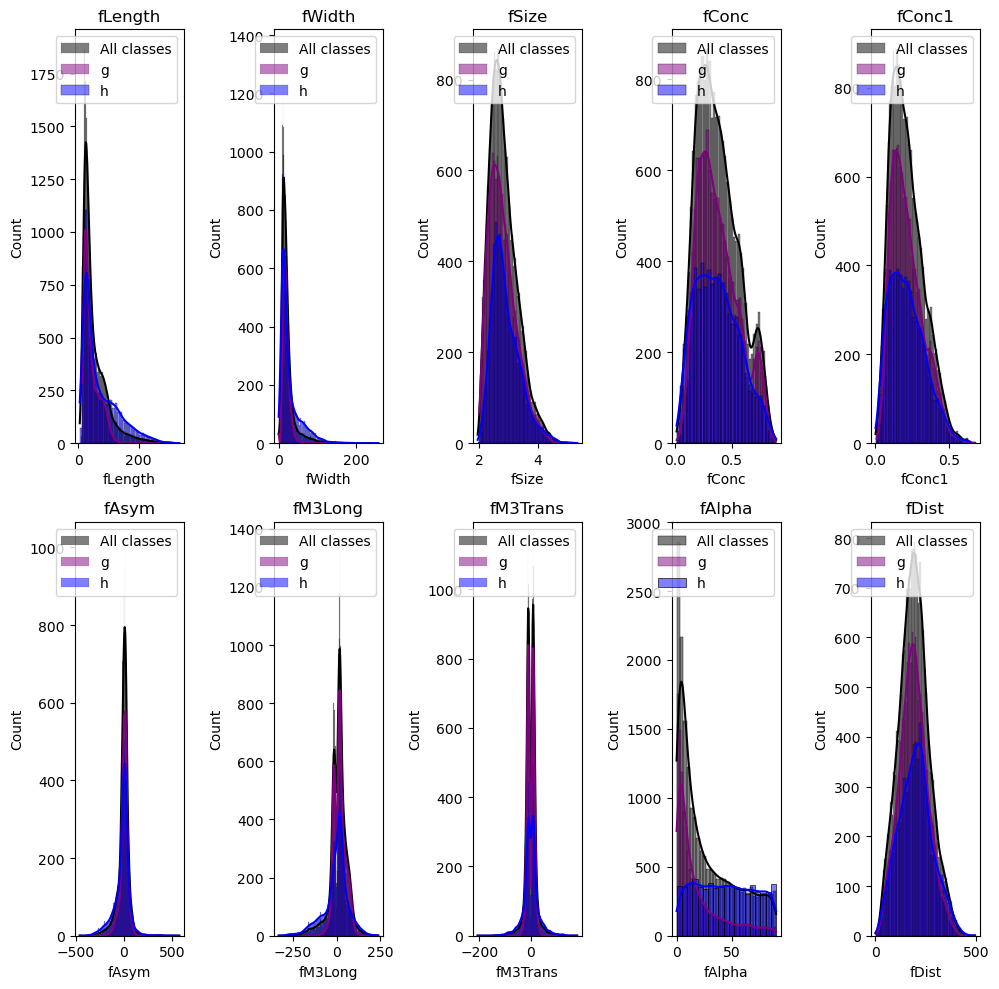

In [15]:
colors = ['purple', 'blue'] 
fig = plt.figure(figsize=(10, 10))
for feature_index, feature in enumerate(feature_names):
    ax = plt.subplot(2, 5, feature_index + 1)  
    plt.title(feature)
    sns.histplot(df[feature], color='black', label='All classes', kde=True, stat="count", ax=ax)
    
    for class_index, target in enumerate(target_names):
        sns.histplot(df[df['class'] == target][feature], 
                     color=colors[class_index], 
                     label=target, 
                     kde=True, 
                     stat="count", 
                     ax=ax)
    
    ax.legend()
plt.tight_layout()
plt.show()

#### Класите имаат забележителни разлики на атрибутите fSize, fConc, fConcl and fAlpha.

## Дијаграми на растурање

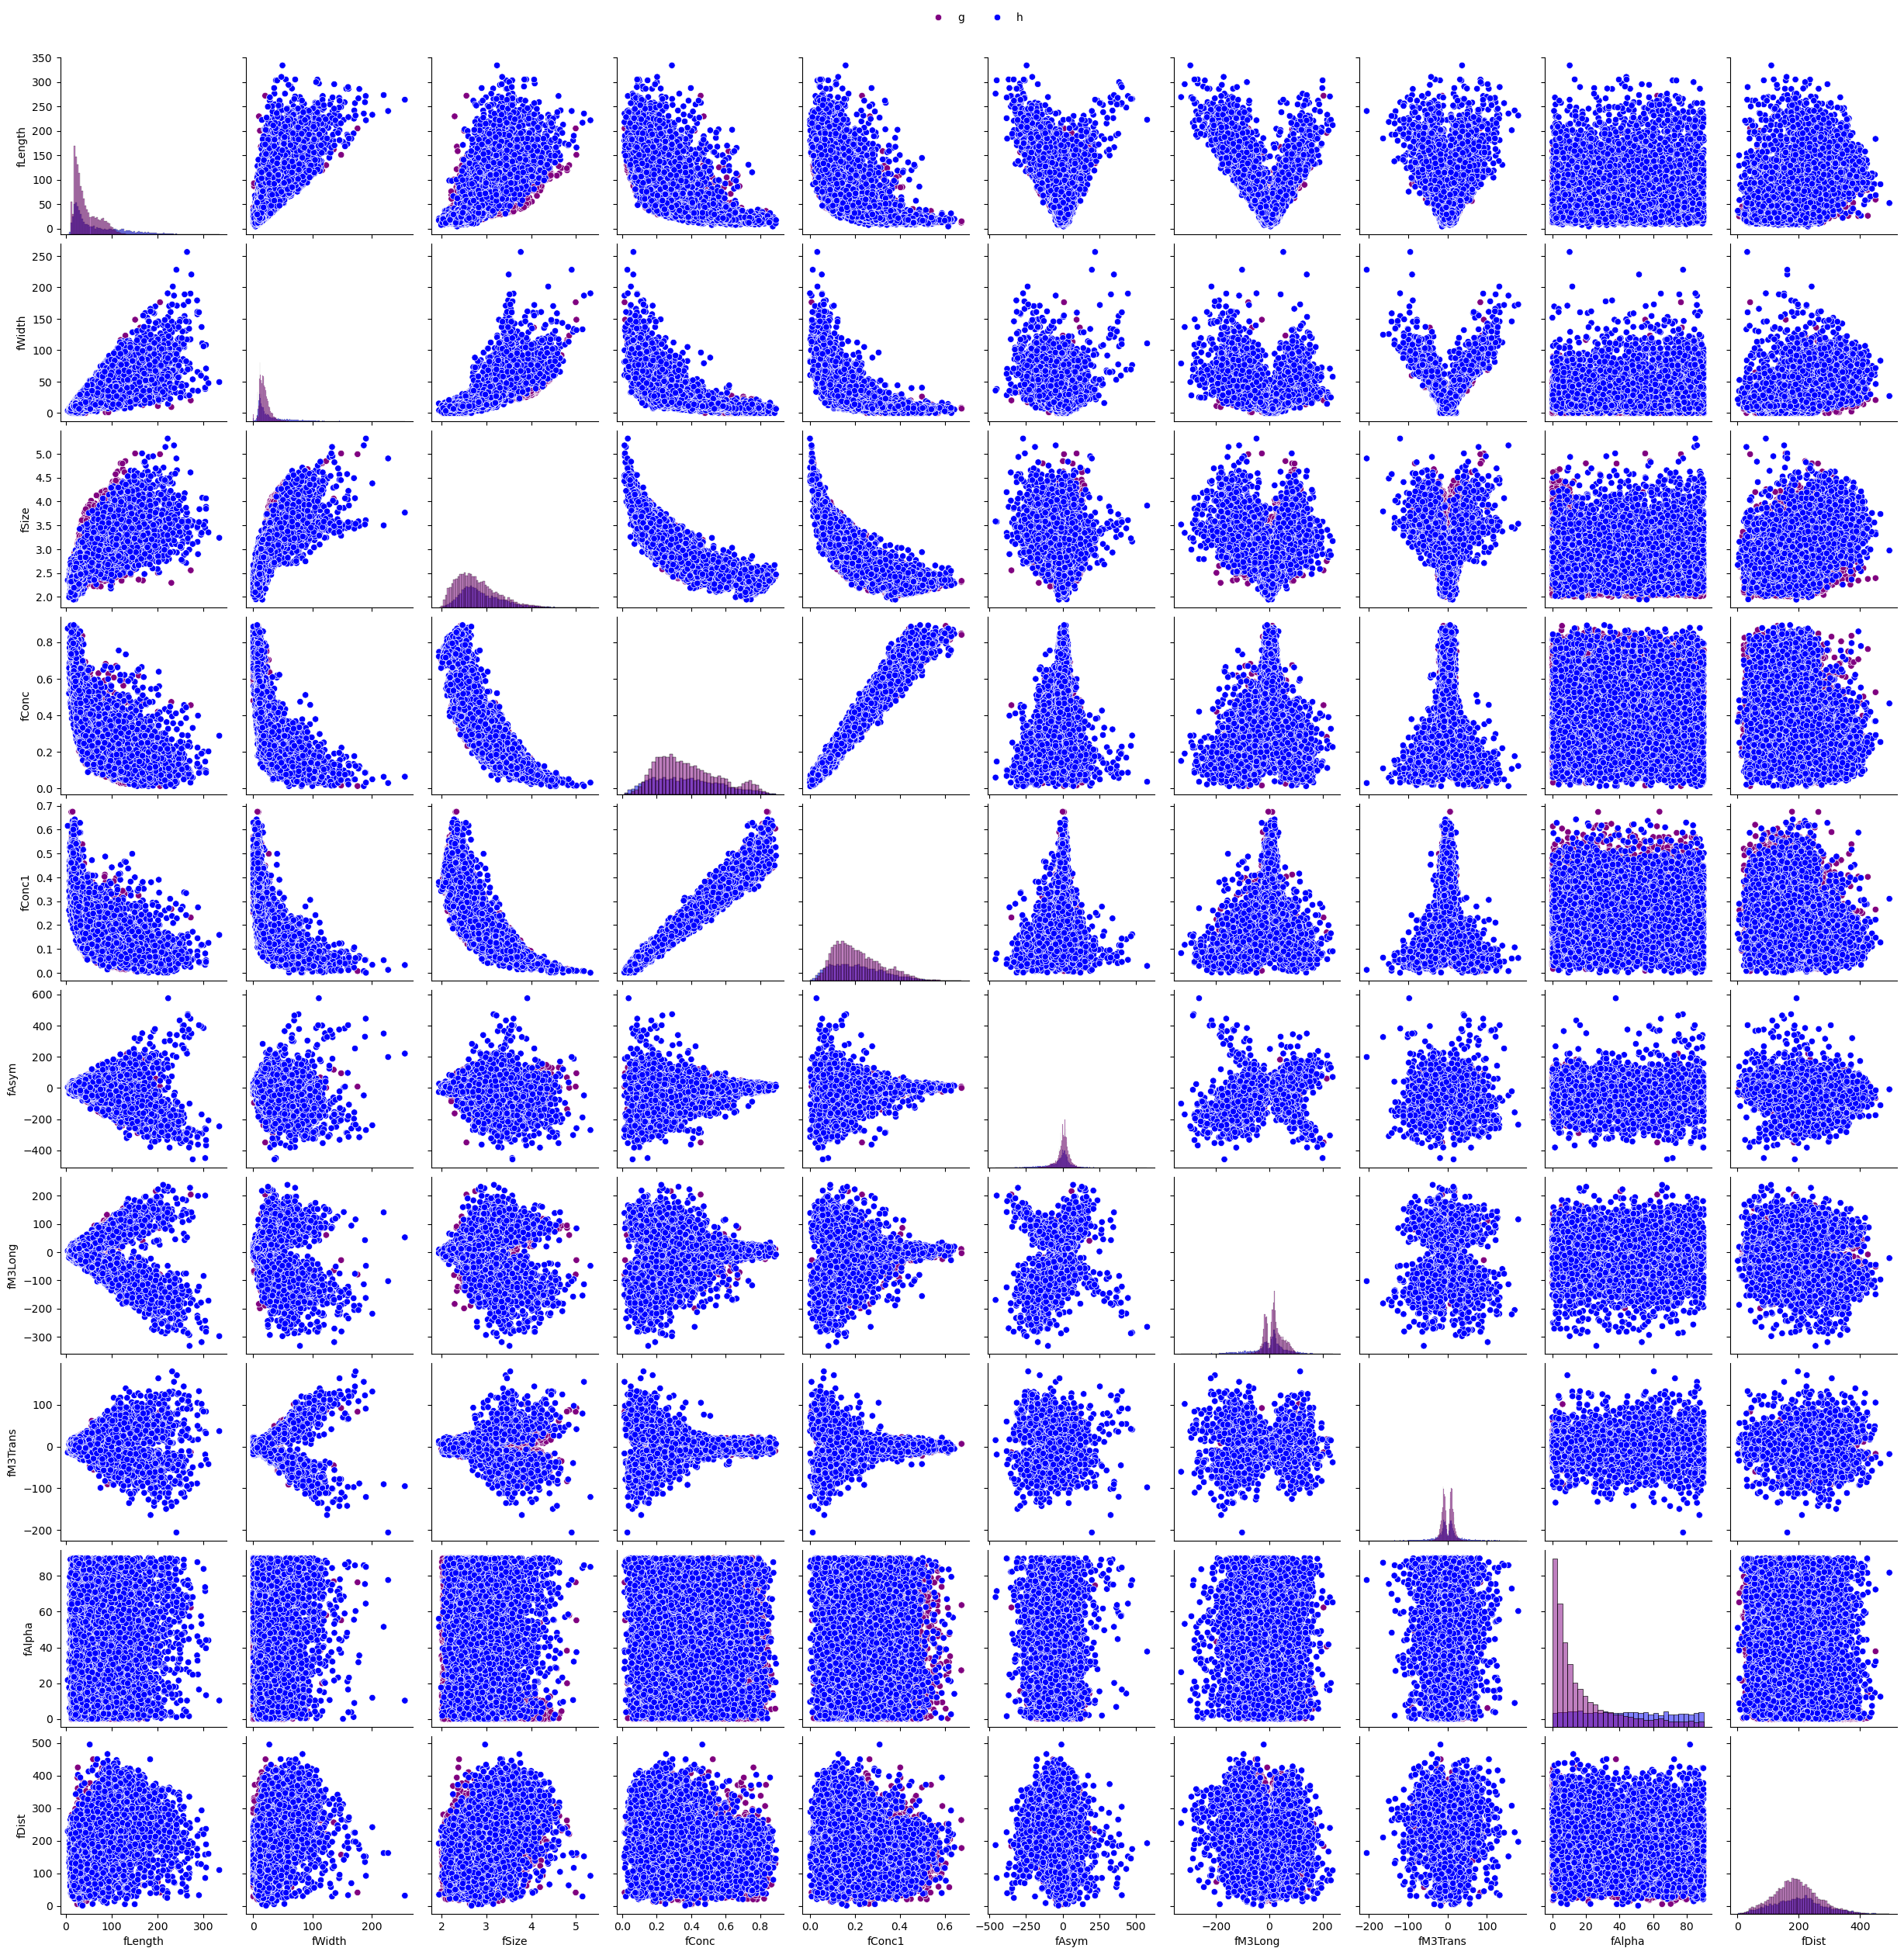

In [40]:
g=sns.pairplot(df, hue="class", diag_kind="hist",palette=colors);
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=3, title=None);
for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)

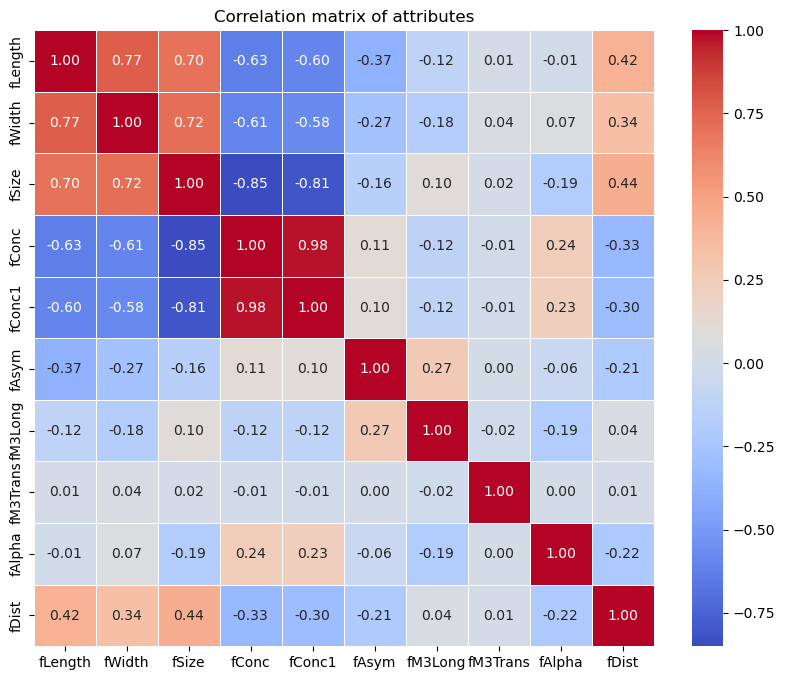

In [48]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix of attributes')
plt.show()

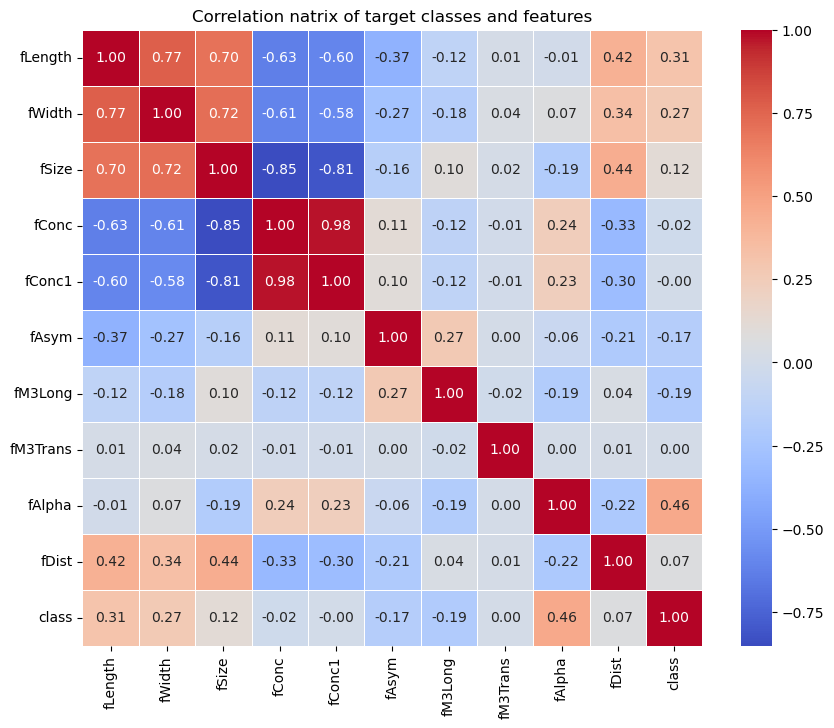

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation natrix of target classes and features')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
GNB = GaussianNB() 
GNB.fit(X_train, y_train.values.ravel())
y_pred = GNB.predict(X_test)

In [33]:
GNB_accuracy = accuracy_score(y_test, y_pred)

In [35]:
print("Gaussian NB accuracy: ", GNB_accuracy)

Gaussian NB accuracy:  0.7274798457763757


### LDA

##### Бројот на атрибути во податочното множество е 10, а бројот на класи е 2. Тоа значи дека влезниот простор треба да е намален во една димензија.

In [39]:
LDA_reduce = LinearDiscriminantAnalysis(n_components=1) 
LDA_reduce.fit(X, y.values.ravel())
X_reduced = LDA_reduce.transform(X)

In [49]:
X_reduced

array([[ 0.2568096 ],
       [ 0.67204003],
       [-3.49572287],
       ...,
       [-0.15824298],
       [-3.6933639 ],
       [-3.60500821]])

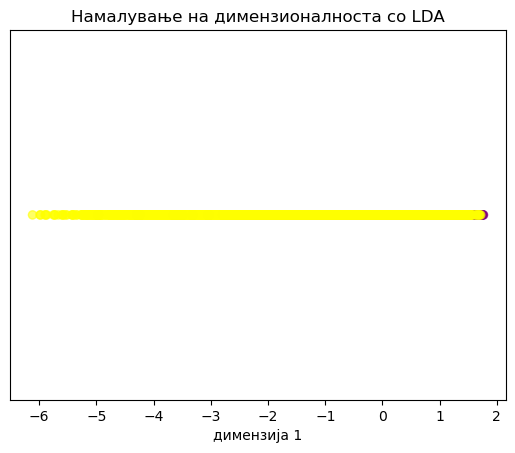

In [61]:
class_mapping = {'g': 0, 'h': 1}  
y_numeric = y['class'].map(class_mapping)

plt.scatter(X_reduced, [0] * len(X_reduced), c=y_numeric.map({0: 'purple', 1: 'yellow'}), alpha=0.6)
plt.xlabel("димензија 1")
plt.yticks([]) 
plt.title("Намалување на димензионалноста со LDA")
plt.show()

In [65]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train.values.ravel())

QuadraticDiscriminantAnalysis()

In [67]:
print("Приорните веројатности на класите се",QDA.priors_)

Приорните веројатности на класите се [0.64796455 0.35203545]


In [71]:
y_pred = QDA.predict(X_test) 
QDA_accuracy = accuracy_score(y_test, y_pred) 
print("Точноста на класификацијата со методот QDA во податочното множество е",round(QDA_accuracy,3))

Точноста на класификацијата со методот QDA во податочното множество е 0.785


In [77]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train.values.ravel())
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test, y_pred)
print("Точноста на класификацијата со методот LDA во податочното множество е",round(LDA_accuracy,3)) 

Точноста на класификацијата со методот LDA во податочното множество е 0.787


# Класификација со редуцираното податочно множество

In [80]:
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

### QDA

In [84]:
QDA_reduced = QuadraticDiscriminantAnalysis() 
QDA_reduced.fit(X_reduced_train, y_reduced_train.values.ravel()) 
QDA_reduced.predict(X_reduced_test) 
QDA_reduced_accuracy = accuracy_score(y_test, y_pred) 
print("Точноста на класификацијата со методот QDA во редуцираното податочно множество е",round(QDA_reduced_accuracy,3)) 

Точноста на класификацијата со методот QDA во редуцираното податочно множество е 0.787


### GNB

In [90]:
GNB_reduced = GaussianNB()
GNB_reduced.fit(X_reduced_train, y_reduced_train.values.ravel())
y_pred = GNB_reduced.predict(X_reduced_test)
GNB_reduced_accuracy = accuracy_score(y_test, y_pred) 
print("Точноста на класификацијата со Гаусов наивен Баесов класификатор во редуцираното податочно множество е",round(GNB_reduced_accuracy,3)) 

Точноста на класификацијата со Гаусов наивен Баесов класификатор во редуцираното податочно множество е 0.787


### LDA

In [96]:
LDA_reduced = LinearDiscriminantAnalysis(solver='lsqr') 
LDA_reduced.fit(X_reduced_train, y_reduced_train.values.ravel()) 
y_pred = LDA_reduced.predict(X_reduced_test)
LDA_reduced_accuracy = accuracy_score(y_test, y_pred) 
print("Точноста на класификацијата со методот LDA во редуцираното податочно множество е",round(LDA_reduced_accuracy,3)) 

Точноста на класификацијата со методот LDA во редуцираното податочно множество е 0.787
